In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm import tqdm

In [2]:
path_dataset = '../dataset/FIGURAS_ML_PUC_2019_Co/'
files = os.listdir(path_dataset)
files = files[:]

In [3]:
img = cv2.imread(path_dataset+files[:1][0])

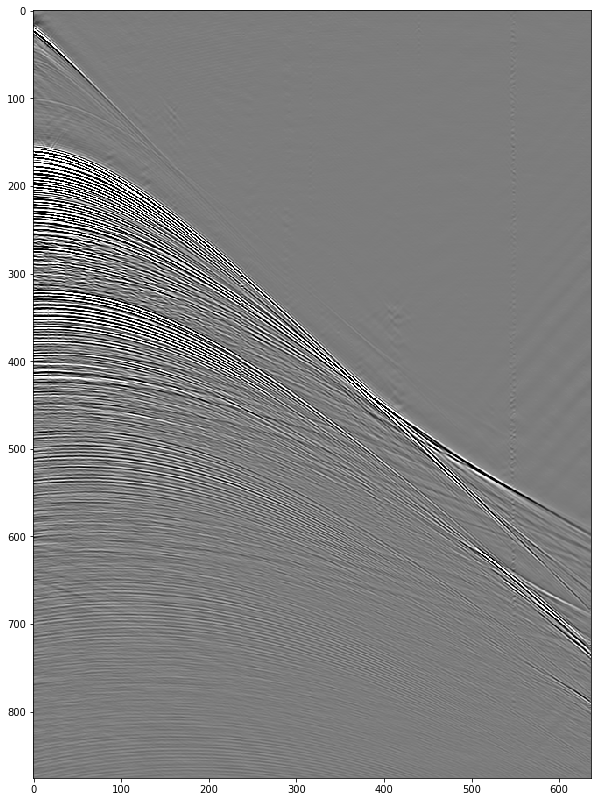

In [4]:
plt.figure(figsize=(10,20))
plt.imshow(img)

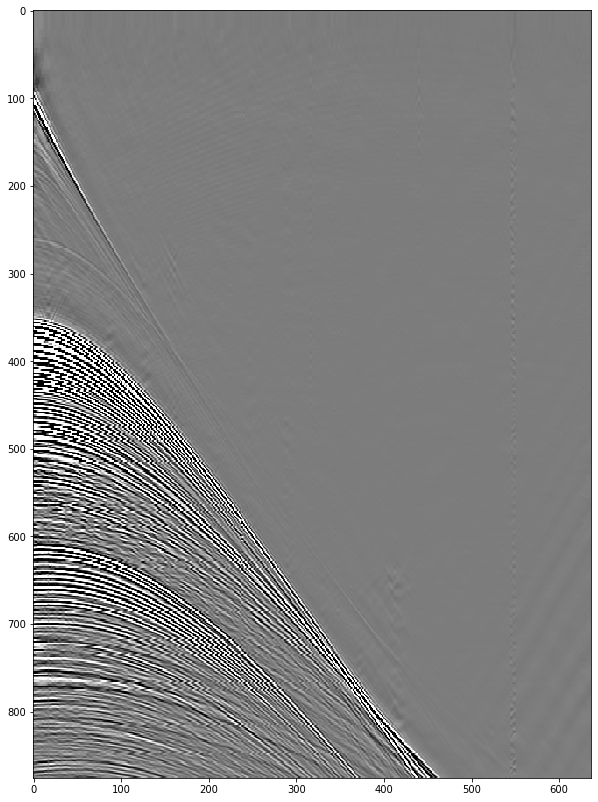

In [229]:
newImage = img.copy()

x = np.array([float(i) for i in range(0,img.shape[0])])
v = 1.5
To = 100
transform = np.ceil(np.sqrt((x/v)**2+To**2)-To)
for column in range(0,img.shape[1]):
    for line, transformation in enumerate(transform):
        #print(column,line,column,int(transformation))
        newImage[line,column] = img[int(transformation),column]

plt.figure(figsize=(10,20))
plt.imshow(newImage)

## Augmentation Seismic

100%|██████████| 1/1 [00:00<00:00, 12.30it/s]


(876, 637) sismoMod_Exp_00001172.png


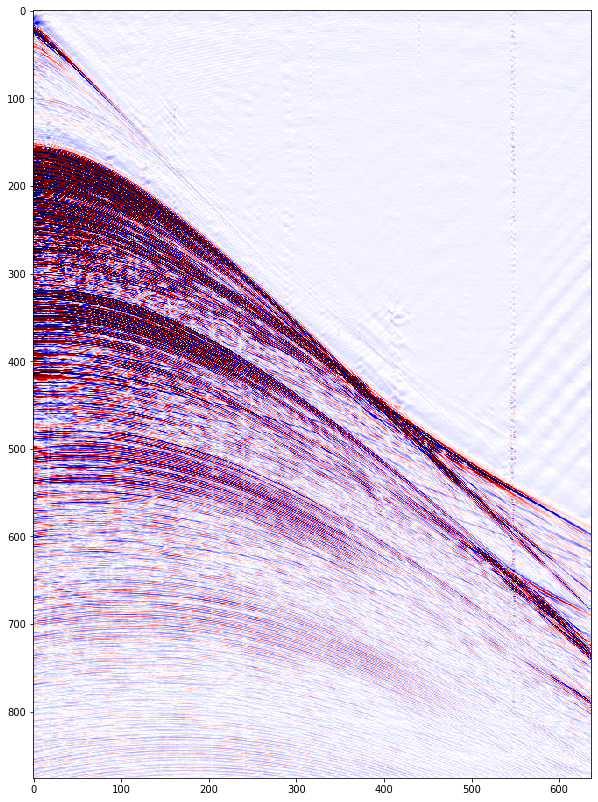

In [5]:
number_of_files = 1

path_to_save = f'../dataset/Train_Seismic/'
#try: os.mkdir( path_to_save )
#except: pass
for index, filename in enumerate(tqdm(files[:number_of_files])):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        picture = cv2.imread( path_dataset + filename )
        picture = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY)

        plt.figure(figsize=(10,20))
        plt.imshow(picture/255, cmap='seismic', vmin=0, vmax=1)
        print(picture.shape, filename)
        #cv2.imwrite( path_to_save + filename, picture/255, cmap='seismic', vmin=0, vmax=1 )

## Augmentation  Vertical, Horizontal and BOTH

In [11]:
shape_max = (200,200,3)
gray = [128,128,128]
number_of_files = 500

operations = ['augV','augH','augB'] 
chosed = 0
path_to_save = f'../../dataset/augmented/{operations[chosed]}/'
try: os.mkdir( path_to_save )
except: pass
for index, filename in enumerate(tqdm(files[:number_of_files])):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        picture = cv2.imread( path_dataset + filename )
        # inverte a orientação
        if operations[chosed] == 'augV': picture = cv2.flip( picture, 1 )
        if operations[chosed] == 'augH': picture = cv2.flip( picture, 0 )
        if operations[chosed] == 'augB': picture = cv2.flip( picture, -1 )
        
        # resize para tamanho menor
        w = shape_max[0] / picture.shape[1]
        h = shape_max[1] / picture.shape[0]
        p = min(h,w)
        w = int(p*picture.shape[1])
        h = int(p*picture.shape[0])
        picture = cv2.resize(picture, (w, h), interpolation = cv2.INTER_AREA)
        
        # adiciona padding
        delta_w = shape_max[0] - picture.shape[1]
        delta_h = shape_max[1] - picture.shape[0]
        top, bottom = 0, delta_h
        left, right = 0, delta_w
        constant= cv2.copyMakeBorder(picture, top, bottom, left, right,cv2.BORDER_CONSTANT, value=gray)
        
        #plt.figure(figsize=(10,20))
        #plt.imshow(constant)
        #print(constant.shape, filename)
        cv2.imwrite( path_to_save + filename, constant )



  0%|          | 0/300 [00:00<?, ?it/s]

  1%|          | 2/300 [00:00<00:16, 17.92it/s]

  3%|▎         | 10/300 [00:00<00:12, 23.24it/s]

  6%|▌         | 18/300 [00:00<00:09, 29.48it/s]

  9%|▊         | 26/300 [00:00<00:07, 36.24it/s]

 11%|█▏        | 34/300 [00:00<00:06, 43.18it/s]

 14%|█▍        | 42/300 [00:00<00:05, 49.99it/s]

 16%|█▋        | 49/300 [00:00<00:05, 45.29it/s]

 18%|█▊        | 55/300 [00:00<00:05, 43.81it/s]

 20%|██        | 61/300 [00:01<00:07, 30.31it/s]

 22%|██▏       | 66/300 [00:01<00:07, 33.14it/s]

 24%|██▎       | 71/300 [00:01<00:06, 36.35it/s]

 25%|██▌       | 76/300 [00:01<00:06, 33.63it/s]

 27%|██▋       | 80/300 [00:01<00:06, 31.86it/s]

 28%|██▊       | 84/300 [00:01<00:06, 32.39it/s]

 30%|██▉       | 89/300 [00:02<00:05, 36.19it/s]

 31%|███       | 93/300 [00:02<00:08, 24.60it/s]

 32%|███▏      | 97/300 [00:02<00:08, 24.38it/s]

 34%|███▍      | 102/300 [00:02<00:06, 28.70it/s]

 36%|███▌      | 107/300 [00:02<00:06, 31.96it/s]

 38%|█

## Augmentation Common Mid Point (CMP)

In [16]:
vs = [0.95,1, 1.2]
Tos = [150,250,350,450]
number_of_files = 500 #len(files)
operations = ['cmp','vcmp']  

for To in Tos:
    for v in vs: 
        for operation in operations:
            path_to_save = '../../dataset/augmented/'+operation+'_'+str(v)+'_'+str(To)
            try: os.mkdir( path_to_save )
            except: pass
            for index, filename in enumerate(tqdm(files[:number_of_files])):
                if filename.endswith('.png') or filename.endswith('.jpg'):
                    picture = cv2.imread( path_dataset + filename )
                    newImage = picture.copy()

                    x = np.array([float(i) for i in range(picture.shape[0])])
                    transform = np.ceil(np.sqrt((x/v)**2+To**2)-To)
                    for column in range(picture.shape[1]):
                        for line, transformation in enumerate(transform):

                            newImage[line,column] = picture[int(transformation),column]
                    picture = newImage
                    # flip na vertical
                    if operation == 'vcmp':
                        picture = cv2.flip( picture, 1 )

                    #plt.figure(figsize=(10,20))
                    #plt.imshow(picture)
                    cv2.imwrite( path_to_save + '/' + filename, picture )

100%|██████████| 500/500 [02:46<00:00,  3.06it/s]


## Augmentation Padding

### Centralizado

In [38]:
shape_max = (1000,1000,3)
gray = [128,128,128]

for index, filename in enumerate(tqdm(files)):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        picture = cv2.imread( path_dataset + filename )
        delta_w = shape_max[0] - picture.shape[1]
        delta_h = shape_max[1] - picture.shape[0]
        top, bottom = delta_h//2, delta_h-(delta_h//2)
        left, right = delta_w//2, delta_w-(delta_w//2)
        constant= cv2.copyMakeBorder(picture, top, bottom, left, right,cv2.BORDER_CONSTANT)#, value=gray)
        #plt.imshow(constant)
        #print(constant.shape, filename)
        cv2.imwrite( '../../dataset/Test_Padding/' + filename, constant )




  0%|          | 0/1312 [00:00<?, ?it/s]


  0%|          | 1/1312 [00:00<08:39,  2.52it/s]


  0%|          | 2/1312 [00:00<07:26,  2.93it/s]


  0%|          | 4/1312 [00:00<05:34,  3.91it/s]


  0%|          | 6/1312 [00:00<04:20,  5.02it/s]


  1%|          | 8/1312 [00:00<03:25,  6.33it/s]


  1%|          | 10/1312 [00:01<02:44,  7.93it/s]


  1%|          | 12/1312 [00:01<02:19,  9.33it/s]


  1%|          | 14/1312 [00:01<02:18,  9.40it/s]


  1%|          | 16/1312 [00:01<02:01, 10.71it/s]


  1%|▏         | 18/1312 [00:01<01:45, 12.31it/s]


  2%|▏         | 21/1312 [00:01<01:31, 14.07it/s]


  2%|▏         | 24/1312 [00:01<01:22, 15.58it/s]


  2%|▏         | 26/1312 [00:02<01:17, 16.63it/s]


  2%|▏         | 28/1312 [00:02<01:14, 17.25it/s]


  2%|▏         | 30/1312 [00:02<01:11, 17.83it/s]


  3%|▎         | 33/1312 [00:02<01:10, 18.09it/s]


  3%|▎         | 35/1312 [00:02<01:09, 18.34it/s]


  3%|▎         | 38/1312 [00:02<01:04, 19.70it/s]


  3%|▎         | 41/131

### Superior Esquerda

In [8]:
shape_max = (1000,1000,3)
gray = [0,0,0]
number_of_files = len(files)
path_to_save = '../../dataset/Train_Padding_LU/'
try: os.mkdir( path_to_save )
    
except: pass
for index, filename in enumerate(tqdm(files[:number_of_files])):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        picture = cv2.imread( path_dataset + filename )
        delta_w = shape_max[0] - picture.shape[1]
        delta_h = shape_max[1] - picture.shape[0]
        top, bottom = 0, delta_h
        left, right = 0, delta_w
        constant= cv2.copyMakeBorder(picture, top, bottom, left, right,cv2.BORDER_CONSTANT, value=gray)
        #plt.imshow(constant)
        #print(constant.shape, filename)
        cv2.imwrite( path_to_save + filename, constant )


100%|██████████| 5223/5223 [03:46<00:00, 23.03it/s]

### Superior Esquerda 200

In [36]:
shape_max = (200,280,3)
gray = [128,128,128]
number_of_files = len(files)

path_to_save = '../../dataset/Train_200_280/'
try: os.mkdir( path_to_save )
except: pass
for index, filename in enumerate(tqdm(files[:number_of_files])):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        picture = cv2.imread( path_dataset + filename )
        w = shape_max[0] / picture.shape[1]
        h = shape_max[1] / picture.shape[0]
        p = min(h,w)
        w = int(p*picture.shape[1])
        h = int(p*picture.shape[0])
        picture = cv2.resize(picture, (w, h), interpolation = cv2.INTER_AREA)
        delta_w = shape_max[0] - picture.shape[1]
        delta_h = shape_max[1] - picture.shape[0]
        top, bottom = 0, delta_h
        left, right = 0, delta_w
        constant= cv2.copyMakeBorder(picture, top, bottom, left, right,cv2.BORDER_CONSTANT, value=gray)
        
        #plt.figure(figsize=(10,20))
        #plt.imshow(constant)
        #print(constant.shape, filename)
        cv2.imwrite( path_to_save + filename, constant )



  0%|          | 0/5223 [00:00<?, ?it/s]

  0%|          | 8/5223 [00:00<01:09, 75.12it/s]

  0%|          | 16/5223 [00:00<01:09, 75.37it/s]

  0%|          | 24/5223 [00:00<01:08, 75.93it/s]

  1%|          | 32/5223 [00:00<01:08, 76.05it/s]

  1%|          | 40/5223 [00:00<01:08, 76.17it/s]

  1%|          | 48/5223 [00:00<01:07, 76.58it/s]

  1%|          | 56/5223 [00:00<01:06, 77.22it/s]

  1%|          | 64/5223 [00:00<01:06, 77.20it/s]

  1%|▏         | 72/5223 [00:00<01:06, 77.52it/s]

  2%|▏         | 80/5223 [00:01<01:06, 77.59it/s]

  2%|▏         | 88/5223 [00:01<01:06, 77.39it/s]

  2%|▏         | 96/5223 [00:01<01:06, 76.55it/s]

  2%|▏         | 104/5223 [00:01<01:06, 76.77it/s]

  2%|▏         | 112/5223 [00:01<01:06, 77.13it/s]

  2%|▏         | 120/5223 [00:01<01:06, 76.90it/s]

  2%|▏         | 128/5223 [00:01<01:06, 76.80it/s]

  3%|▎         | 136/5223 [00:01<01:05, 77.15it/s]

  3%|▎         | 144/5223 [00:01<01:07, 74.87it/s]

  3%|▎         | 152/5223 [00:01<

## Augmentation Cropping

In [25]:
shape_max = (876,632,3)

for index, filename in enumerate(tqdm(files)):
    picture = cv2.imread( path_dataset + filename )
    constant= picture[0:876,0:632,1]
    #plt.imshow(constant)
    cv2.imwrite( '../../dataset/cropped/' + filename, constant )

100%|██████████| 5223/5223 [02:19<00:00, 37.51it/s]
